In [2]:
import math
import numpy as np
from pint import UnitRegistry
unit = UnitRegistry()
unit.formatter.default_format = "~"


# Parameters
spring_constant = 1.1 * 4 * unit.N / unit.mm
spring_length_resting = 112 * unit.mm

weight_total = 14 * unit.kg

dampening = 1 * unit.N / (unit.m / unit.s)

def spring_length_at(weight):
    return (weight * unit.standard_gravity / spring_constant + spring_length_resting).to(unit.mm)

def resonant_freq_at(weight):
    return (1 / (2 * math.pi) * np.sqrt(spring_constant / weight)).to(unit.Hz)

spring_length = spring_length_at(weight_total)
f0 = resonant_freq_at(weight_total)

print(f"Length: {spring_length:~.1f}")
print(f"Freq:   {f0:~.3f}")

Length: 143.2 mm
Freq:   2.822 Hz


In [3]:
def lehr_dampening_factor(d, k, m):
    return d / (2 * np.sqrt(m * k))

lehr_dampening = lehr_dampening_factor(dampening, spring_constant, weight_total)
lehr_dampening.ito_reduced_units()
lehr_dampening

<Quantity(0.00201455741, 'dimensionless')>

/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1355: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


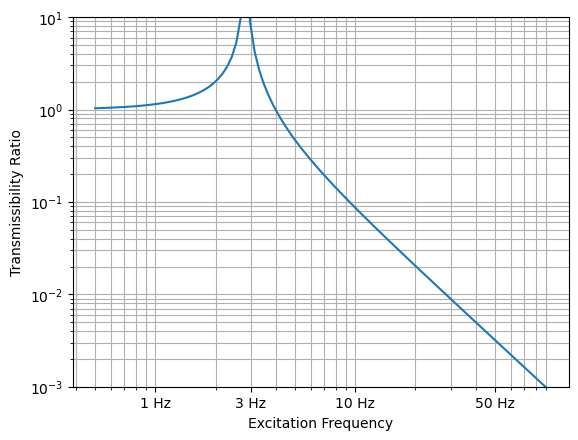

In [31]:
def amplitude_ratio(lehr, f0, f):
    eta = f / f0
    return 1 / np.sqrt((1 - eta**2)**2 + (2 * eta * lehr)**2)

f_in = np.geomspace(0.5, 90, 100) * unit.Hz
ratio = amplitude_ratio(lehr_dampening, f0, f_in)

import matplotlib.pyplot as plt
plt.plot(f_in, ratio)

def transmissibility_plot_setup(plt):
    plt.xscale('log')
    xticks = [1, 3, 10, 50]
    plt.xticks(xticks, [f"{t} Hz" for t in xticks], minor=False)
    plt.xlabel("Excitation Frequency")
    
    plt.ylim(0.001, 10)
    plt.yscale('log')
    plt.ylabel("Transmissibility Ratio")
    
    plt.grid(True, "both")

transmissibility_plot_setup(plt)

/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1355: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


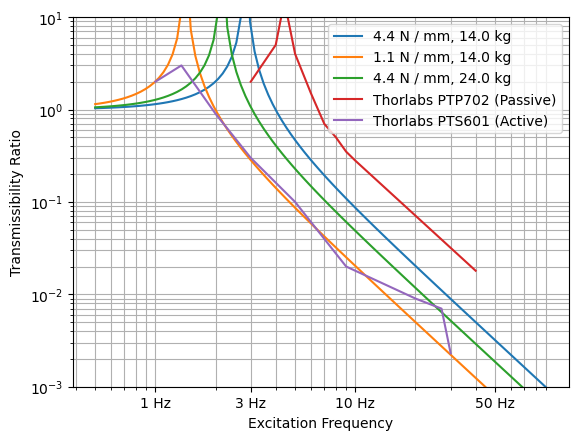

In [34]:
def ratio_for_dkm(d, k, m, f_in):
    f0 = (1 / (2 * math.pi) * np.sqrt(k / m)).to(unit.Hz)
    lehr = lehr_dampening_factor(d, k, m)
    return amplitude_ratio(lehr, f0, f_in)

d = dampening
k = [
    spring_constant,
    spring_constant / 4,
]
m = [
    weight_total,
    24 * unit.kg,
]

import matplotlib.pyplot as plt
for k_ in k:
    m_ = m[0]
    plt.plot(f_in, ratio_for_dkm(d, k_, m_, f_in), label=f"{k_:~.1f}, {m_:~.1f}")
for m_ in m[1:]:
    k_ = k[0]
    plt.plot(f_in, ratio_for_dkm(d, k_, m_, f_in), label=f"{k_:~.1f}, {m_:~.1f}")

ref_thorlabs_f = [3, 4, 4.42, 5, 6,   7,   8,   9,    10,   40]
ref_thorlabs_r = [2, 5, 15.0, 4, 1.5, 0.7, 0.5, 0.35, 0.28, 0.018]
plt.plot(ref_thorlabs_f, ref_thorlabs_r, label="Thorlabs PTP702 (Passive)")

ref_thorlabs_f = [1, 1.35, 2,   3,   5,   9,    20,   27,     30]
ref_thorlabs_r = [2, 3,    0.9, 0.3, 0.1, 0.02, 0.009, 0.007, 0.0023]
plt.plot(ref_thorlabs_f, ref_thorlabs_r, label="Thorlabs PTS601 (Active)")
    
plt.legend(loc="upper right")
transmissibility_plot_setup(plt)